#   Was verdient ein Data Scientist?

Diese Frage stellen sich angehende Data Analysten und Scientists sicher häufig. Die Antwort ist, wie so oft, "Das kommt drauf an."

Daher wollen wir uns ansehen, welche Faktoren einen Einfluss auf das Gehalt für diesen Berufszweig haben. Auf diese Weise können wir eventuell eine zuverlässige, datenbasierte Vorhersage machen. Entsprechende Daten hierzu finden wir zum Beispiel in diesem Datensatz. 

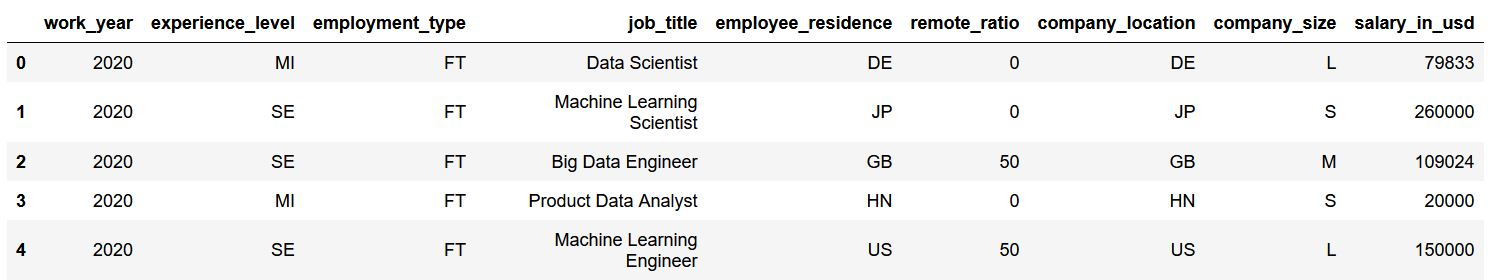

Er liegt in dem Dateiformat CSV (comma seperated values) vor und lässt sich leicht herunterladen (https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries). Das haben wir hier schon vorbereitet.

Eine Übersicht über die Daten erhältst Du durch das Datenwörterbuch, in dem beschrieben ist, was der Datensatz genau enthält:

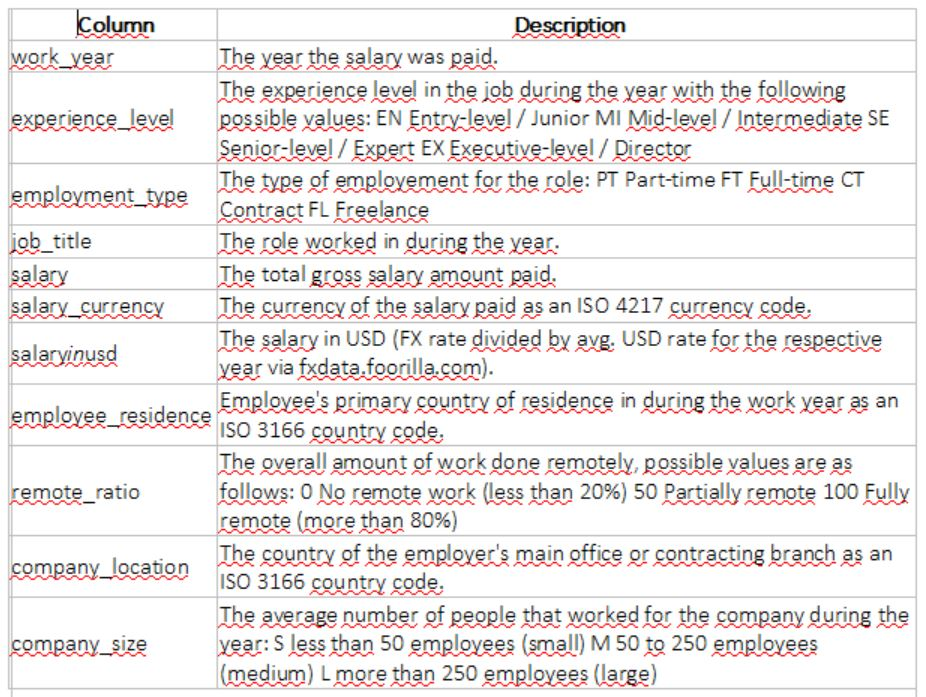

Der erste Schritt für uns besteht darin, die Daten in eine Form zu bringen, die es uns ermöglicht, mit ihnen zu arbeiten. Das Tabellenformat mit Spalten und Zeilen sollte jedem, der schon einmal mit Daten gearbeitet hat, vertraut sein. Für uns bietet sich hier das Python Modul pandas an. Es erlaubt uns, sogenannte Dataframes zu erstellen. Dataframes erlauben die Darstellung der Daten in einer übersichtlichen Tabellenform sowie den Zugriff und die Manipulation einzelner Spalten Zeilen und sogar Zellen.

pandas muss als externes Modul meist zunächst installiert werden, was hier schon getan wurde. Um es verwenden zu können, muss es noch importiert werden, wobei es emist durch das Alias pd abgekürzt wird.

In [ ]:
# Hint: Wie das Importieren von Modulen in Python funktioniert wird zu Beginn des Trainings in einer 
# Wiederholungseinheit behandelt.
import pandas as pd

Zunächst lesen wir das Datenset ein und schauen es uns an, um einen Eindruck zu erhalten.
Zum Einlesen nutzen wir die pandas-Methode read_csv(). Als Parameter übergeben wir dieser Methode innerhalb der Klammern den Dateipfad (filepath_or_buffer), unter dem die csv-Datei zu finden ist, definieren die erste Spalte als Indexspalte des Dataframes (index_col) und weisen jeder Spalte einen Datentyp zu (dtype). In diesem Datenset befinden sich numerische und kategorische Spalten, denen wir jeweils  den Datentypen integer bzw. category zuweisen.

Duplizierte Einträge werden in der nächsten Zeile durch die Methode drop_duplicates() entfernt.

Führe die nächste Code-Zelle einfach aus.

In [ ]:
# Einlesen der Daten
df = pd.read_csv(filepath_or_buffer='ds_salary.csv', index_col=0, 
                 dtype={'work_year':'int64', 'experience_level':'category', 'employment_type':'category', 
                        'job_title':'category', 'employee_residence':'category', 'remote_ratio':'int64', 
                        'company_location':'category', 'company_size':'category', 'salary_in_usd':'int64'})

# Entfernen duplizierter Einträge
df = df.drop_duplicates(keep = 'first')

Die Daten sind nun eingelesen und wurden der Variable df mit dem Gleichheitszeichen zugewiesen. Das bedeutet, in dieser Variablen steckt jetzt unsere Datentabelle. Um sie uns die ersten 5 Zeilen anzusehen, können wir die pandas-Methode head() auf unseren Dateframe df anwenden. Dies tun wir, indem wir die Variable df durch einen Punkt mit der Methode verbinden, also in der Form df.head().

In [ ]:
# Lösung:
df.head()

Das sieht schon einmal gut aus. Aber wie erhalten wir nun weitere Informationen über unseren Datensatz? Pandas gibt uns hierfür z.B. die Methode info(). Wende sie auf den Dataframe an und prüfe, welche Informationen Dir ausgegeben werden.

In [ ]:
# Hint: Wende die Methode info() auf den DataFrame df an, indem Du sie mittels eines Punktes verbindest, in der Form df.info().
# Lösung:
df.info()

Wie wir sehen liefert uns dies zusammenfassende Informationen über unseren Datensatz. Unter anderem erfahren wir, wieviele Zeileneinträge und Spalten vorhanden sind und welche Bezeichnung (labels) die Spalten besitzen. Außerdem erhalten wir einen ersten Überblick über eventuelle fehlende Werte (Non-Null Count) und in welchen Datentyp die Spalten jeweils kodiert sind. 

In unserem Datensatz finden wir numerische Spalten vom Typ Integer (int64) und kategorische Spalten vom Datentyp category. Fehlende Werte scheint es nicht zu geben, da in allen Spalten 565 Einträge vorhanden sind, von den 565 "non-null" (also nicht fehlend) sind.

Werfen wir einen kurzen Blick in die numerischen Spalten. Hierfür eigenet sich die pandas-Methode describe(). Wende Sie auf den DataFrame df an.

In [ ]:
# Lösung:
df.describe()

Mit dieser Methode wird eine Übersicht aller numerischen Spalten des DataFrames erstellt, die Kennwerte wie die Anzahl der nicht-fehlenden Werte (count), den arithmetischen Mittelwert aller Zeilen in der Spalte (mean) und deren Standardabweichung (std) sowie Minimal- und Maximalwerte als auch die Perzentilwerte für 25, 50 und 75% der der Daten.

Nun sehen wir uns noch die kategorischen Spalten an. Hier haben wir zwei Spalten, die ordinal skaliert sind. Dies ist einerseits die Spalte 'experience_level' und andererseits 'company_size'. 
Die ordinale Skalierung bedeutet, dass die Kategorien in eine Rangordnung gebracht werden können. Hier würde z.B. für 'experience_level' gelten, dass EN < MI < SE < EX, und für 'company_size', dass S < M < L.

Dies erreichen wir hier z.B. mit der pandas-Methode replace(), der ein dictionary übergeben wird, welche Kategorie mit welchem numerischen Wert ersetzt wird. In der Spalte 'experience_level' soll das Einstiegslevel 'EN' mit dem Wert Null ersetzt werden, das mittlere Level 'MI' mit dem Wert 1 usw.

Führe die nächste Code-Zelle einfach aus.

In [ ]:
# oranger Hinweiskasten:
# Wie ein dictionary aufgebaut ist und wie man auf einzelene Elemente darin zugreifen kann, wird in
# der einführenden Wiederholungseinheit behandelt.

In [ ]:
df.loc[:, 'experience_level'] = df.loc[:, 'experience_level'].replace({'EN':0, 'MI': 1, 'SE':2, 'EX': 3})
df.loc[:, 'company_size'] = df.loc[:, 'company_size'].replace({'S':0, 'M': 1, 'L':2})

Werfen wir noch einmal einen Blick auf unseren bearbeiteten Datensatz. Lass Dir hierfür die ersten 5 Zeilen des Datensatzes ausgeben.

In [ ]:
# Lösung:
df.head()

Von den neun Spalten enthalten nun fünf numerische Werte. In der Spalte 'salary_in_usd' sind die Werte der Gehälter hinterlget.

Unser Ziel ist es nun anhand einer Stellenbeschreibung, die Informationen wie 'work_year', 'expericence_level' usw. enthält,  das voraussichtliche Gehalt vorherzusagen. Hierzu können wir uns eines Machine Learning Modells bedienen.

In diesem Fall werden wir eine lineare Regression zur Hilfe nehmen und ein solches Modell mit den Daten trainieren, die in den ersten acht Spalten unseres DataFrames enthalten sind. Dies sind unsere features.
Nachdem das Modell trainiert ist, werden wir eine Vorhersage für unsere Zielvariable (target), die Spalte 'salary_in_usd', erstellen und diese Vorhersage mit den tatsächlich in dieser Spalte hinterlegten Werten vergleichen. 
Hierzu teilen wir unseren Datensatz zunächst in features und target auf.

Erstelle im ersten Schritt die Variable features und weise ihr die ersten acht Spalten des DataFrames df zu. Dies kannst Du z.B. erreichen, indem Du die pandas-Methode drop() auf df anwendest. Dem Parameter columns dieser Methode weist Du das Spaltenlabel 'salary_in_usd' zu. Dies ist die Spalte, die dann entfernt wird.

Die Dokumentation der drop()-Methode findest Du hier: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [ ]:
# Hint: Du kannst der Variablen features den gesamten DataFrame df abzüglich der letzten Spalte durch 
#       df.drop(columns='salary_in_usd') zuweisen.
# Lösung:
features = df.drop(columns='salary_in_usd')

Hinter der Variablen features verbirgt sich nun ein neuer DataFrame mit acht Spalten. Lass Dir für diesen die ersten 5 Zeilen ausgeben.

In [ ]:
# Lösung:
features.head()

Die Zielvariable lässt sich durch Zuweisung der Spalte 'salary_in_usd' zur Variablen target erreichen. Eine einzelne Spalte kannst Du auswählen, indem Du das Label der Spalte in eckigen Klammern hinter den Namen des DataFrames schreibst.

In [ ]:
# Hint: Die Spalte 'salary_in_usd' lässt sich z.B. durch df['salary_in_usd'] auswählen.
# Lösung:
target = df['salary_in_usd']

Machine Learning Modelle können nur mit numerischen Daten arbeiten. Der Einfachheit halber wählen wir daher nur die numerischen Spalten unserer Features aus. Dies erreichst Du durch Anwenden der pandas-Methode select_dtypes(), indem Du dem Parameter include den Wert 'number' übergibst. Vergiss nicht, das Ergebnis wieder der Variablen features zuzuweisen.

Die entsprechene Dokumentation der Methode findest Du hier: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html

In [ ]:
# oranger Hinweis-Kasten:
# Im Verlauf des Trainings lernst Du, wie Du  nicht-numerischen Spalten bearbeiten kannst, 
# um sie für das Training von Machine Learning Modellen nutzbar zu machen.

In [ ]:
# Hint: features.select_dtypes(include='number')
# Lösung:
features = features.select_dtypes(include='number')
features.head()

Nun haben wir unsere features und unser target in einem Format aufbereitet, dass uns das Training eines Machine Learning Models erlaubt. Wie erwähnt testen wir hier ein einfaches lineares Regressionsmodell.

Die Bibliothek scikit-learn bietet ein solches Modell an. Dieses müssen wir zunächst importieren. 

Die Schritte, um ein solches Modell zu fitten und eine Vorhersage der Zielvariablen zu erhalten sind:

1. Instanziieren des Modells
2. Trainieren des Modells
3. Vorhersage erzeugen

Diese Schritte haben wir in der folgenden Zelle vorbereitet. Du kannst sie einfach ausführen.

Das Ergebnis ist eine Vorhersage der Zielvariablen, welche terget_pred zugewiesen wird.

In [ ]:
# oranger HInweiskasten:
# Im Laufe des Trainings werden diese Schritte strutkturiert vermittelt ud aufgebaut, so dass Du in der Lge bist,
# jedes beliebige Modell selbst zu trainieren und Vorhersagen zu erzeugen.

In [ ]:
# Import des Modells aus der Bibliothek scikit-learn
from sklearn.linear_model import LinearRegression

# 1. Instanzieeren des noch nicht trainierten Modells
model_linreg = LinearRegression()

# 2. Training des Modells mit den Features und den bekannten Werten der Zielvariablen mit der Methode fit()
model_linreg.fit(features, target)



Das Modell ist nun trainiert und kann eine Vorhersage für das Gehalt machen.

Nehmen wir an, wir haben eine Stellenbeschreibung für einen Data Scientist im Jahr 2022. es handelt sich um eine Senior Position (Level 2) ohne Remote-Option in einer mittelgroßen Firma (company_size M bzw. 1). Speichern wir diese Informationen in einer Variablen features_aim.

In [ ]:
# erzeuge neue Features features_aim
features_aim = pd.DataFrame(data={'work_year': 2022, 'experience_level':2, 'remote_ratio':0, 'company_size':1}, index=range(1))
features_aim

Dies können wir jetzt nutzen, um eine Vorhersage des voraussichtlichen Gehalts für diese Stelle zu erzeugen. Hierzu nutzen wir die Methode predict() und speichern sie in der Variablen target_pred.

Führe die Code-zelle aus.

In [ ]:
# 3. Erzeugung der Vorhersage target_pred mit der Methode predict()
target_pred = model_linreg.predict(features_aim)

# Ausgabe der Vorhersage
print(target_pred[0])

Wie Du siehst wird ein Gehalt von ca. 126.014,00 US-Dollar vorhergesagt. Der tatsächliche Wert beträgt jedoch fast 180.000,00 US-Dollar. Diese starke Abweichung lässt sich u.a. dadruch erklären, dass wir die kategorischen Features nicht zum Training unseres Modells herangezogen haben.

In [ ]:
# grüne Abschlusszelle

Herzlichen Glückwunsch! Du hast nicht nur gelernt, wie man einen Datensatz aus einer csv-Datei einliest, ihn einer einfachen Analyse unterzieht und umstrukturiert, sondern auch ein erstes simples Machine Learning Modell trainiert und eine Vorhersage erzeugt.